In [ ]:
# Mount Google Colab

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd '/content/gdrive/My Drive/Masters_Thesis'


Mounted at /content/gdrive
/content/gdrive/My Drive/Masters_Thesis


In [ ]:
!pip install stepmix # library used to build LCA model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from stepmix.stepmix import StepMix

from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

np.random.seed(42)

In [ ]:
# Provide the filename of your Excel file
file_name = 'preprocessed_reduced_pcaSC.xlsx'

# Read the Excel file into a pandas DataFrame
reduced_pcaSC = pd.read_excel(file_name)

#Splitting data into answers for ALL TESTS

In [ ]:
# Specify the column names you want to keep
columns_to_keep = ['question_id', 'maingroup', 'level1subgroup']

# Subset the DataFrame using the specified columns
df1 = reduced_pcaSC.loc[:, columns_to_keep]

#df1 = df1.drop(['maingroup'], axis=1)
qs = df1.drop_duplicates(subset='question_id')
qs = qs.sort_values('level1subgroup')

qs = qs.dropna(subset=['level1subgroup'])

# Create the 'short_name' column
qs['short_name'] = ''
qs
# Personality
count_a = 1
count_c = 1
count_i = 1
count_o = 1
count_r = 1
count_s = 1

# Work_values
count_dp = 1
count_toe = 1
count_r2 = 1
count_c2 = 1
count_s2 = 1
count_i2 = 1

# Work_Styles
count_peo_o = 1
count_si = 1
count_a2 = 1
count_d2 = 1
count_pi = 1
count_per_o = 1
count_i3 = 1

# Skills
count_cont = 1
count_p = 1
count_so = 1
count_cp = 1
count_t = 1
count_sy = 1
count_rm = 1

for index, row in qs.iterrows():
    if row['level1subgroup'] == 'Artistiek':
        qs.at[index, 'short_name'] = f'art{count_a}'
        count_a += 1

    elif row['level1subgroup'] == 'Conventioneel':
        qs.at[index, 'short_name'] = f'con{count_c}'
        count_c += 1

    elif row['level1subgroup'] == 'Intellectueel':
        qs.at[index, 'short_name'] = f'int{count_i}'
        count_i += 1

    elif row['level1subgroup'] == 'Ondernemend':
        qs.at[index, 'short_name'] = f'ond{count_o}'
        count_o += 1

    elif row['level1subgroup'] == 'Realistisch':
        qs.at[index, 'short_name'] = f'rea{count_r}'
        count_r += 1
    elif row['level1subgroup'] == 'Sociaal':
        qs.at[index, 'short_name'] = f'soc{count_s}'
        count_s += 1
############################################

    elif row['level1subgroup'] == 'Prestaties leveren':
        qs.at[index, 'short_name'] = f'drp{count_dp}'
        count_dp += 1

    elif row['level1subgroup'] == 'Arbeidsvoorwaarden':
        qs.at[index, 'short_name'] = f'toe{count_toe}'
        count_toe += 1

    elif row['level1subgroup'] == 'Erkenning':
        qs.at[index, 'short_name'] = f'rec{count_r2}'
        count_r2 += 1

    elif row['level1subgroup'] == 'Collegialiteit':
        qs.at[index, 'short_name'] = f'col{count_c2}'
        count_c2 += 1

    elif row['level1subgroup'] == 'Ondersteuning':
        qs.at[index, 'short_name'] = f'sup{count_s2}'
        count_s2 += 1

    elif row['level1subgroup'] == 'Onafhankelijkheid' and row['maingroup'] == 'tests.workvalues.title':
        qs.at[index, 'short_name'] = f'ind{count_i2}'
        count_i2 += 1
############################################

    elif row['level1subgroup'] == 'Gerichtheid op mensen':
        qs.at[index, 'short_name'] = f'peo{count_peo_o}'
        count_peo_o += 1

    elif row['level1subgroup'] == 'Sociale invloed':
        qs.at[index, 'short_name'] = f'sin{count_si}'
        count_si += 1

    elif row['level1subgroup'] == 'Aanpassingsvermogen':
        qs.at[index, 'short_name'] = f'ada{count_a2}'
        count_a2 += 1

    elif row['level1subgroup'] == 'Zorgvuldigheid':
        qs.at[index, 'short_name'] = f'dil{count_d2}'
        count_d2 += 1

    elif row['level1subgroup'] == 'Praktisch inzicht':
        qs.at[index, 'short_name'] = f'pin{count_pi}'
        count_pi += 1

    elif row['level1subgroup'] == 'Prestatiegerichtheid':
        qs.at[index, 'short_name'] = f'per{count_per_o}'
        count_per_o += 1

    elif row['level1subgroup'] == 'Onafhankelijkheid':
        qs.at[index, 'short_name'] = f'inde{count_i3}'
        count_i3 += 1
############################################

    elif row['level1subgroup'] == 'content':
        qs.at[index, 'short_name'] = f'cont{count_cont}'
        count_cont += 1

    elif row['level1subgroup'] == 'process':
        qs.at[index, 'short_name'] = f'pro{count_p}'
        count_p += 1

    elif row['level1subgroup'] == 'socialskills':
        qs.at[index, 'short_name'] = f'scs{count_so}'
        count_so += 1

    elif row['level1subgroup'] == 'complexproblemsolving':
        qs.at[index, 'short_name'] = f'cps{count_cp}'
        count_cp += 1

    elif row['level1subgroup'] == 'technicalskills':
        qs.at[index, 'short_name'] = f'tec{count_t}'
        count_t += 1

    elif row['level1subgroup'] == 'systemskills':
        qs.at[index, 'short_name'] = f'sys{count_sy}'
        count_sy += 1

    elif row['level1subgroup'] == 'resourcemanagementskills':
        qs.at[index, 'short_name'] = f'rms{count_rm}'
        count_rm += 1

qs = qs.drop(['maingroup'], axis=1)
qs

,question_id,level1subgroup,short_name
34,2352,Arbeidsvoorwaarden,toe1
33,2344,Arbeidsvoorwaarden,toe2
11,2266,Artistiek,art1
27,2229,Artistiek,art2
35,2350,Collegialiteit,col1
19,2284,Conventioneel,con1
2,2283,Conventioneel,con2
17,2282,Conventioneel,con3
29,2246,Conventioneel,con4
41,2401,Gerichtheid op mensen,peo1


In [ ]:
n_qs = qs.drop(['level1subgroup'], axis=1)

# merging (left join) studeies to orginal dataframe
new_qs = pd.merge(reduced_pcaSC, n_qs, on='question_id', how='left')
new_qs.head(3)
new_qs = new_qs.dropna(subset=['level1subgroup'])
new_qs

,question_id,dossier_id,answeredTest_id,question,type,label,datetime,maingroup,maingroup_id,faculty,level1subgroup,level1subgroup_id,answer,short_name
0,2269,1152,19833,question.id_2269,likert/likert5puntsacceptatie2positiefpluseen,je gevoelens duidelijk uiten,2022-06-27 12:36:27,Beroepskeuzetest,459,Faculteit Geesteswetenschappen,Sociaal,455,0.750000,soc1
1,2278,1152,19833,question.id_2278,likert/likert5puntsacceptatie2positiefpluseen,activiteiten en evenementen organiseren,2022-06-27 12:36:27,Beroepskeuzetest,459,Faculteit Geesteswetenschappen,Ondernemend,456,0.750000,ond2
2,2283,1152,19833,question.id_2283,likert/likert5puntsacceptatie2positiefpluseen,goed overweg met een computer,2022-06-27 12:36:27,Beroepskeuzetest,459,Faculteit Geesteswetenschappen,Conventioneel,457,0.750000,con2
3,2279,1152,19833,question.id_2279,likert/likert5puntsacceptatie2positiefpluseen,een groepsgesprek leiden,2022-06-27 12:36:27,Beroepskeuzetest,459,Faculteit Geesteswetenschappen,Ondernemend,456,0.500000,ond3
4,2250,1152,19833,question.id_2250,likert/likert5puntsacceptatie2positiefpluseen,elektrische dingen fixen,2022-06-27 12:36:27,Beroepskeuzetest,459,Faculteit Geesteswetenschappen,Realistisch,452,0.250000,rea5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32762,2561,91930,25251,question.id_2561,likert/likert7puntslegeschaalpositief,Ik kan uitstekend dingen repareren. Toelichtin...,2023-04-27 21:03:57,Competenties,525,Faculteit Geesteswetenschappen,technicalskills,\N,0.166667,tec7
32763,2403,91930,25252,question.id_2403,likert/likert6puntsmatepositief,Om mijn werk goed te doen is het belangrijk om...,2023-04-27 21:06:14,tests.workstyles.title,516,Faculteit Geesteswetenschappen,Gerichtheid op mensen,526,0.600000,peo2
32764,2402,91930,25252,question.id_2402,likert/likert6puntsmatepositief,Om mijn werk goed te doen is het belangrijk om...,2023-04-27 21:06:14,tests.workstyles.title,516,Faculteit Geesteswetenschappen,Gerichtheid op mensen,526,0.400000,peo3
32765,2401,91930,25252,question.id_2401,likert/likert6puntsmatepositief,Om mijn werk goed te doen is het belangrijk om...,2023-04-27 21:06:14,tests.workstyles.title,516,Faculteit Geesteswetenschappen,Gerichtheid op mensen,526,0.800000,peo1


In [ ]:
# Create pivot table for Questions
qs_data = pd.pivot_table(new_qs, values='answer', index='dossier_id', columns='short_name')

# Reset the index of 'qs_data'
qs_data = qs_data.reset_index()
# Remove the index name 'short_name'
qs_data = qs_data.rename_axis(None, axis=1)

#Remove NANs
qs_data.replace('', np.nan, inplace=True)
qs_data = qs_data.dropna()
qs_data

,dossier_id,art1,art2,col1,con1,con2,con3,con4,cont1,ind1,...,soc4,tec1,tec2,tec3,tec4,tec5,tec6,tec7,toe1,toe2
4,2112,0.75,0.50,0.6,0.00,0.75,0.50,0.00,0.500000,0.6,...,1.00,0.500000,0.333333,0.000000,0.000000,0.166667,0.000000,0.166667,0.6,0.0
9,42916,0.50,0.50,0.8,0.75,0.75,0.75,0.75,0.333333,0.8,...,0.75,0.500000,0.500000,0.333333,0.500000,0.333333,0.500000,0.500000,0.8,0.6
17,50367,0.50,0.25,0.8,0.50,0.50,0.75,0.25,0.666667,0.6,...,0.75,0.833333,0.333333,0.500000,0.333333,0.500000,0.500000,0.500000,0.8,0.4
30,55937,0.75,0.50,0.6,1.00,1.00,1.00,0.50,0.333333,0.4,...,1.00,0.333333,0.333333,0.166667,0.166667,0.166667,0.333333,0.500000,0.6,0.2
34,56999,0.50,0.50,0.6,0.00,0.50,0.25,0.00,0.666667,0.2,...,0.75,0.166667,0.333333,0.166667,0.000000,0.333333,0.500000,0.333333,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,91848,0.75,0.50,0.6,0.25,0.50,0.50,0.25,0.666667,0.6,...,1.00,0.333333,0.166667,0.333333,0.000000,0.166667,0.000000,0.166667,0.8,0.4
745,91894,0.75,0.50,0.8,0.75,1.00,0.50,0.75,0.500000,0.6,...,0.25,0.666667,0.500000,0.166667,0.500000,0.666667,0.666667,0.166667,0.8,0.4
747,91927,0.50,0.25,0.4,0.25,0.75,0.75,0.25,0.500000,0.6,...,0.75,0.000000,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000,0.6,0.4
748,91928,1.00,0.75,0.8,0.50,1.00,0.75,0.50,0.666667,0.8,...,0.75,0.666667,0.833333,0.666667,0.833333,0.500000,0.666667,0.833333,0.6,0.6


In [ ]:
model = qs_data.drop('dossier_id', axis=1)

# Define a custom sorting function
def custom_sort(column):
    prefix = column[:-1]  # Extract the prefix (e.g., "art" or "soc")
    suffix = int(column[-1])  # Extract the numerical suffix
    return prefix, suffix

# Get the column names and sort them using the custom sort function
sorted_columns = sorted(model.columns, key=custom_sort)

# Assign the sorted column names back to the DataFrame
model = model[sorted_columns]

model
# Collect data for LCA before possible K-Means manipulation
data_lca = model

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# creating X variable to use as to not effect the model data
X = model

# Define the range of cluster numbers to test
n_clusters_range = range(2, 10)

# Initialize dictionaries to store the metrics
metrics = {
    'silhouette': [],
    'calinski_harabasz': [],
    'davies_bouldin': [],
    'n_clusters': []
}

# Loop over the cluster numbers and perform clustering
for i, n_clusters in enumerate(n_clusters_range):

    # Run hierarchical clustering using the ward linkage method
    ward_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    ward_cluster.fit(X)

    # Extract the labels and linkage matrix
    ward_labels = ward_cluster.labels_
    linkage_matrix = ward_cluster.children_

    # Extract the cluster centroids from the linkage matrix
    centroids = []
    for j in range(n_clusters):
        indices = ward_labels == j
        centroid = X[indices].mean(axis=0)
        centroids.append(centroid)
    kmeans_cluster = KMeans(n_clusters=n_clusters, init=centroids, n_init=1, random_state=0)
    kmeans_cluster.fit(X)
    cluster_labels = kmeans_cluster.labels_

    # Calculate the metrics for the current cluster assignment
    inertia = kmeans_cluster.inertia_
    silhouette = silhouette_score(X, kmeans_cluster.labels_)
    calinski_harabasz = calinski_harabasz_score(X, kmeans_cluster.labels_)
    davies_bouldin = davies_bouldin_score(X, kmeans_cluster.labels_)

    # Store the metrics in the dictionary
    metrics['silhouette'].append(silhouette)
    metrics['calinski_harabasz'].append(calinski_harabasz)
    metrics['davies_bouldin'].append(davies_bouldin)
    metrics['n_clusters'].append(n_clusters)

# Convert the metrics dictionary to a Pandas dataframe
metrics_df = pd.DataFrame(metrics)

metrics_df

,silhouette,calinski_harabasz,davies_bouldin,n_clusters
0,0.144718,51.106762,2.217739,2
1,0.071054,32.646354,2.881581,3
2,0.060799,26.817131,3.133952,4
3,0.060819,23.220838,2.866345,5
4,0.060506,20.349967,2.745472,6
5,0.050262,18.139187,2.828309,7
6,0.042745,16.433356,2.829125,8
7,0.043314,14.833226,2.860900,9


<Axes: xlabel='PC1', ylabel='PC2'>

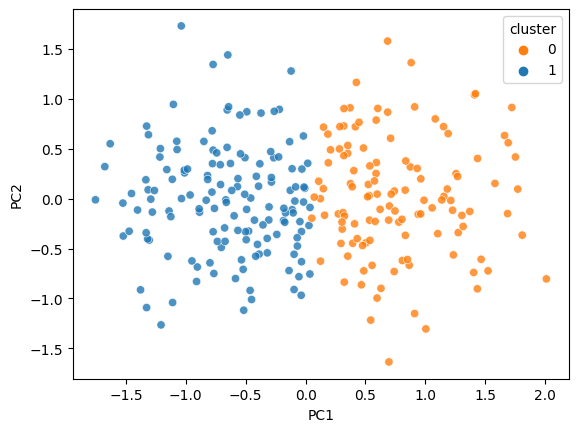

In [ ]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

seed = 1234 # Used for reproducibility

kmeans = KMeans(n_clusters=2, n_init = 10, random_state=seed)
k_fit = kmeans.fit(model)
centroids = kmeans.cluster_centers_
predictions = k_fit.labels_

# Develop 2 PCA components for visualizations
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(model),columns=['PC1','PC2'])

# To maintain cluster colours to allow for easier comparison between cluster plots
color_dict = dict({0: sns.color_palette("tab10")[1], 1: sns.color_palette("tab10")[0]})

pca_data['cluster'] = pd.Categorical(predictions)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data, palette=color_dict, alpha=0.8)

In [ ]:
#pca_data.to_excel('pcaSC_ALL_TESTS_clusters.xlsx', index=False) # to be used for comparison in personality notebook

#Latent Class Analysis

In [ ]:
from sklearn.model_selection import ParameterGrid
# Create LCA model
model = StepMix(n_components=3, measurement="categorical", verbose=1, random_state=123, n_init=10)

grid = {
    'n_components': [2, 3, 4, 5, 6, 7, 8, 9],
    'n_steps' : [1]
}

results = dict(param_n_steps=[], param_n_components=[], aic=[], bic=[])


# Same model and grid as above
for g in ParameterGrid(grid):
    model.set_params(**g)
    model.fit(data_lca)
    results['param_n_steps'].append(g['n_steps'])
    results['param_n_components'].append(g['n_components'])
    results['aic'].append(model.aic(data_lca))
    results['bic'].append(model.bic(data_lca))

# Save results to a dataframe
results = pd.DataFrame(results)


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 10/10 [00:04<00:00,  2.33it/s, max_LL=-3.94e+3, max_avg_LL=-15]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 53 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.9413 0.0587 0.0000 0.0000 0.0000 0.0000 0.9932 0.0068 0.0000 0.0000
 0.0000 0.0000 0.9941 0.0059 0.0000 0.0000 0.0000 0.0000 0.9785 0.0215
 0.0000 0.0000 0.0000 0.0000 0.8618 0.1382 0.0000 0.0000 0.0000 0.0000
 0.8526 0.1474 0.0000 0.0000 0.0000 0.0000 0.9672 0.0328 0.0000 0.0000
 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.9646 0.0354 0.0000 0.0000
 0.0000 0.0000 0.8916 0.1084 0.0000 0.0000 0.0000 0.0000 0.9814 0.0186


Initializations (n_init) : 100%|██████████| 10/10 [00:02<00:00,  4.05it/s, max_LL=-3.72e+3, max_avg_LL=-14.1]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 53 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.9378 0.0622 0.0000 0.0000 0.0000 0.0000 0.9931 0.0069 0.0000 0.0000
 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 0.8862 0.1138 0.0000 0.0000 0.0000 0.0000
 0.8628 0.1372 0.0000 0.0000 0.0000 0.0000 0.9726 0.0274 0.0000 0.0000
 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.9677 0.0323 0.0000 0.0000
 0.0000 0.0000 0.9152 0.0848 0.0000 0.0000 0.0000 0.0000 0.9873 0.0127


Initializations (n_init) : 100%|██████████| 10/10 [00:09<00:00,  1.04it/s, max_LL=-3.63e+3, max_avg_LL=-13.8]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 53 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.9439 0.0561 0.0000 0.0000 0.0000 0.0000 0.9444 0.0556 0.0000 0.0000
 0.0000 0.0000 0.9628 0.0372 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 0.8491 0.1509 0.0000 0.0000 0.0000 0.0000
 0.8710 0.1290 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000
 0.0000 0.0000 0.9117 0.0883 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 0.9814 0.0186 0.0000 0.0000 0.0000 0.0000
 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000
 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000


Initializations (n_init) : 100%|██████████| 10/10 [00:16<00:00,  1.61s/it, max_LL=-3.57e+3, max_avg_LL=-13.6]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 53 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.3644 0.6356 0.0000 0.0000 0.0000 0.0000 0.6414 0.3586 0.0000 0.0000
 0.0000 0.0000 0.9679 0.0321 0.0000 0.0000 0.0000 0.0000 0.9010 0.0990
 0.0000 0.0000 0.0000 0.0000 0.7703 0.2297 0.0000 0.0000 0.0000 0.0000
 0.8014 0.1986 0.0000 0.0000 0.0000 0.0000 0.9331 0.0669 0.0000 0.0000
 0.0000 0.0000 0.7371 0.2629 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 0.9679 0.0321 0.0000 0.0000 0.0000 0.0000 0.7063 0.2937 0.0000 0.0000
 0.0000 0.0000 0.8072 0.1928 0.0000 0.0000 0.0000 0.0000 0.9679 0.0321


Initializations (n_init) : 100%|██████████| 10/10 [00:20<00:00,  2.06s/it, max_LL=-3.51e+3, max_avg_LL=-13.4]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 53 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.3614 0.6386 0.0000 0.0000 0.0000 0.0000 0.6177 0.3823 0.0000 0.0000
 0.0000 0.0000 0.9682 0.0318 0.0000 0.0000 0.0000 0.0000 0.9043 0.0957
 0.0000 0.0000 0.0000 0.0000 0.7414 0.2586 0.0000 0.0000 0.0000 0.0000
 0.7755 0.2245 0.0000 0.0000 0.0000 0.0000 0.9045 0.0955 0.0000 0.0000
 0.0000 0.0000 0.6813 0.3187 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 0.9682 0.0318 0.0000 0.0000 0.0000 0.0000 0.7444 0.2556 0.0000 0.0000
 0.0000 0.0000 0.8088 0.1912 0.0000 0.0000 0.0000 0.0000 0.9682 0.0318


Initializations (n_init) : 100%|██████████| 10/10 [00:18<00:00,  1.80s/it, max_LL=-3.48e+3, max_avg_LL=-13.2]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 53 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.7744 0.2256 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000
 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 0.7995 0.2005 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000
 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.9445 0.0555 0.0000 0.0000
 0.0000 0.0000 0.9347 0.0653 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000


Initializations (n_init) : 100%|██████████| 10/10 [00:13<00:00,  1.40s/it, max_LL=-3.44e+3, max_avg_LL=-13.1]


MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 53 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.7090 0.2910 0.0000 0.0000 0.0000 0.0000 0.9420 0.0580 0.0000 0.0000
 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.9709 0.0291
 0.0000 0.0000 0.0000 0.0000 0.9745 0.0255 0.0000 0.0000 0.0000 0.0000
 0.8238 0.1762 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000
 0.0000 0.0000 0.9417 0.0583 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.9139 0.0861 0.0000 0.0000
 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000


Initializations (n_init) : 100%|██████████| 10/10 [00:25<00:00,  2.53s/it, max_LL=-3.41e+3, max_avg_LL=-12.9]

MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 53 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.3549 0.6451 0.0000 0.0000 0.0000 0.0000 0.5938 0.4062 0.0000 0.0000
 0.0000 0.0000 0.9323 0.0677 0.0000 0.0000 0.0000 0.0000 0.8986 0.1014
 0.0000 0.0000 0.0000 0.0000 0.7895 0.2105 0.0000 0.0000 0.0000 0.0000
 0.8291 0.1709 0.0000 0.0000 0.0000 0.0000 0.8985 0.1015 0.0000 0.0000
 0.0000 0.0000 0.7276 0.2724 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000
 0.0000 0.0000 0.0000 0.0000 0.9662 0.0338 0.0000 0.0000 0.0000 0.0000
 0.9662 0.0338 0.0000 0.0000 0.0000 0.0000 0.7254 0.2746 0.0000 0.0000
 0.0000 0.0000 0.8303 0.1697 0.0000 0.0000 0.0000 0.0000 0.9662 0.0338


In [ ]:
results

,param_n_steps,param_n_components,aic,bic
0,1,2,9137.777326,11370.373596
1,1,3,9311.680764,12662.361246
2,1,4,9758.876246,14227.640940
3,1,5,10267.651282,15854.500188
4,1,6,10778.056726,17482.989844
5,1,7,11339.627233,19162.644564
6,1,8,11895.031202,20836.132745
7,1,9,12442.608527,22501.794282
